In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from tqdm import tqdm


def explorationAlgorithm(explorationAlgorithm, param, num_trials, noiseParams, **kwargs):
    cumulativeRewards = []
    for i in tqdm(range(num_trials)):
        # number of time steps
        t = 1000
        # number of arms, 10 in this instance
        k = 10
        # real reward distribution across K arms
        rewards = np.random.normal(1, 1, k)
        # counts for each arm
        n = np.zeros(k)
        # extract expected rewards by running specified exploration algorithm with the parameters above
        # param is the different, specific parameter for each exploration algorithm
        # this would be epsilon for epsilon greedy, initial values for optimistic intialization, c for UCB, and temperature for Boltmann
        currentRewards = explorationAlgorithm(
            param, t, k, rewards, n, noiseParams=noiseParams, **kwargs)
        cumulativeRewards.append(currentRewards)

    # TO DO: CALCULATE AVERAGE REWARDS ACROSS EACH ITERATION TO PRODUCE EXPECTED REWARDS
    expectedRewards = np.mean(cumulativeRewards, axis=0)
    assert len(expectedRewards) == t
    return expectedRewards


def init_qs(k, value=None) -> np.array:
    if value is None:
        qs = np.zeros(k)
    else:
        qs = np.ones(k) * value
    return qs


def argmax_tiebreak(arr: np.array) -> int:
    """arr: n x 1"""
    indices = np.argwhere(np.abs(arr - arr.max()) < 1e-9).flatten()
    if len(indices) == 0:
        return np.random.choice(arr.shape[0]) # randomly choose one
    return np.random.choice(indices)


def genObservedReward(arm, realRewards, noise_params=(0, 1)):
    noise = np.random.normal(noise_params[0], noise_params[1])
    return realRewards[arm] + noise


def plotExplorations(paramList, selectedAlgorithm, num_trials: int, paramLabelName="", num_steps=1000, noiseParams=(0, 1), **kwargs):
    # TO DO: for each parameter in the param list, plot the returns from the exploration Algorithm from each param on the same plot
    x = np.arange(1, 1001)
    # calculate your Ys (expected rewards) per each parameter value
    # plot all the Ys on the same plot
    # include correct labels on your plot!

    for param in paramList:
        expectedRewards = explorationAlgorithm(
            selectedAlgorithm, param=param, num_trials=num_trials, noiseParams=noiseParams, **kwargs)
        print("first ten expected rewards: ", expectedRewards[:10])
        plt.plot(x, expectedRewards, label="=".join(
            [paramLabelName, str(param)]))
        plt.ylabel('Expected Rewards')
        plt.xlabel('Time steps')


## Epsilon

In [23]:
# EPSILON GREEDY TEMPLATE
def epsilonGreedy(epsilon, steps, k, realRewards, n, noiseParams):
    # TO DO: initialize structure to hold expected rewards per step
    expectedRewards = []
    # TO DO: initialize an initial q value for each arm
    qs = init_qs(k)
    # TO DO: implement the epsilon-greedy algorithm over all steps and return the expected rewards across all steps
    for step in range(steps):
        # TO DO: choose an arm based on epsilon greedy
        if random.random() < epsilon:
            arm = random.randint(0, k-1) # random lib: [a, b]
        else:
            arm = argmax_tiebreak(qs)

        observedReward = genObservedReward(arm, realRewards, noiseParams)
        n[arm] += 1
        qs[arm] = qs[arm] + (observedReward - qs[arm]) / n[arm]
        expectedRewards.append((1-epsilon) * realRewards[np.argmax(qs)] + np.sum(epsilon / k * realRewards))
    return expectedRewards


### Without noise

100%|██████████| 100/100 [00:04<00:00, 23.60it/s]


first ten expected rewards:  [1.30170935 1.35025274 1.36117698 1.36117698 1.36117698 1.36117698
 1.36117698 1.36117698 1.36117698 1.36117698]


100%|██████████| 100/100 [00:04<00:00, 23.87it/s]


first ten expected rewards:  [1.3894643  1.39619614 1.40032446 1.40032446 1.40032446 1.40032446
 1.40032446 1.40032446 1.40032446 1.40032446]


100%|██████████| 100/100 [00:04<00:00, 23.97it/s]


first ten expected rewards:  [1.21354197 1.26341235 1.27569133 1.27569133 1.27569133 1.27569133
 1.28825255 1.28938827 1.28938827 1.28938827]


100%|██████████| 100/100 [00:03<00:00, 25.32it/s]


first ten expected rewards:  [1.09019603 1.20314924 1.25658661 1.25855625 1.27390772 1.32786275
 1.32786275 1.36212075 1.37717178 1.3976078 ]


100%|██████████| 100/100 [00:01<00:00, 68.59it/s]


first ten expected rewards:  [1.05687163 1.05687163 1.05687163 1.05687163 1.05687163 1.05687163
 1.05687163 1.05687163 1.05687163 1.05687163]


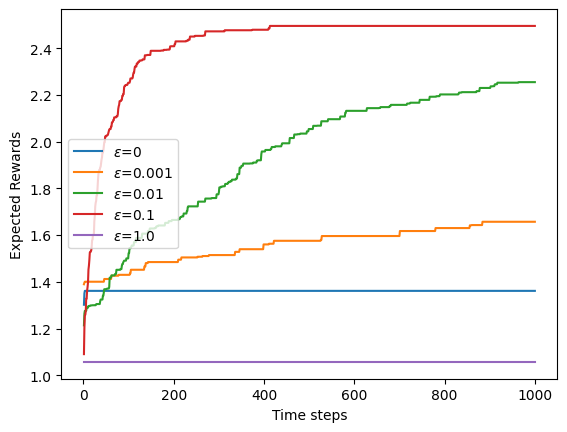

In [25]:
NUM_TRIALS = 100
allEps = [0, 0.001, 0.01, 0.1, 1.0]
# allEps = [0, 0.001]
plotExplorations(allEps, epsilonGreedy, 100,
                 paramLabelName=r"$\varepsilon$", num_steps=1000, noiseParams=(0, 0))
plt.legend()
plt.show()


### With noise from N(0, 1)

100%|██████████| 100/100 [00:04<00:00, 23.71it/s]


first ten expected rewards:  [1.25117662 1.32242164 1.3409556  1.34184229 1.35241191 1.38853454
 1.41751462 1.42933037 1.43048172 1.43048172]


100%|██████████| 100/100 [00:04<00:00, 23.69it/s]


first ten expected rewards:  [1.198881   1.32504553 1.3182254  1.36270376 1.40931206 1.41809547
 1.41809547 1.41809547 1.41809547 1.41687272]


100%|██████████| 100/100 [00:04<00:00, 24.31it/s]


first ten expected rewards:  [1.03417652 1.1800053  1.26893375 1.39570974 1.47990205 1.45084044
 1.45815089 1.49006102 1.52169886 1.52169886]


100%|██████████| 100/100 [00:03<00:00, 25.19it/s]


first ten expected rewards:  [1.16328531 1.31568583 1.41744189 1.44607825 1.51917567 1.51917567
 1.56033206 1.57432497 1.58569226 1.59591906]


100%|██████████| 100/100 [00:01<00:00, 68.59it/s]


first ten expected rewards:  [0.97676246 0.97676246 0.97676246 0.97676246 0.97676246 0.97676246
 0.97676246 0.97676246 0.97676246 0.97676246]


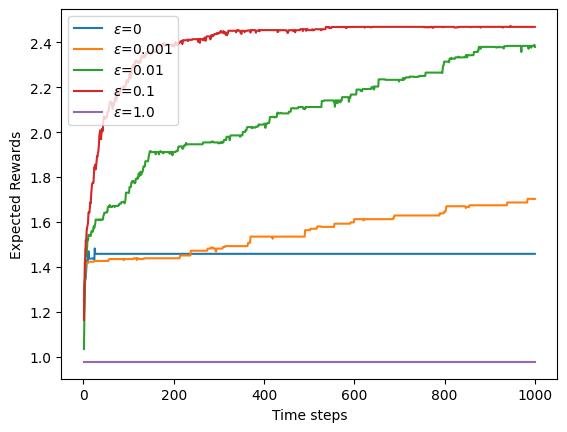

In [24]:
allEps = [0, 0.001, 0.01, 0.1, 1.0]
# allEps = [0, 0.001]
plotExplorations(allEps, epsilonGreedy, num_trials=100,
                 paramLabelName=r"$\varepsilon$", num_steps=1000, noiseParams=(0, 1))
plt.legend()
plt.show()


## Optimistic initialization

In [5]:
# OPTIMISTIC INTIALIZATION TEMPLATE
def optimisticInitialization(value, steps, k, realRewards, n, noiseParams):
    # TO DO: initialize structure to hold expected rewards per step
    expectedRewards = []
    # TO DO: initialize optimistic initial q values per arm specified by parameter
    qs = init_qs(k, value=value)
    # TO DO: implement the optimistic initializaiton algorithm over all steps and return the expected rewards across all steps
    for step in range(steps):
        # TO DO: choose an arm based on epsilon greedy
        arm = np.argmax(qs)
        observedReward = genObservedReward(arm, realRewards, noiseParams)
        expectedRewards.append(realRewards[arm])

        n[arm] += 1
        qs[arm] = qs[arm] + (observedReward - qs[arm]) / n[arm]

    return expectedRewards


### Without noises

100%|██████████| 100/100 [00:00<00:00, 229.02it/s]


first ten expected rewards:  [0.90031002 1.14273081 1.16570787 1.16570787 1.16570787 1.16570787
 1.16570787 1.16570787 1.16570787 1.16570787]


100%|██████████| 100/100 [00:00<00:00, 230.42it/s]


first ten expected rewards:  [1.04149569 1.45643428 1.65465679 1.68982926 1.73677526 1.77040881
 1.75885678 1.75254591 1.7696741  1.78678822]


100%|██████████| 100/100 [00:00<00:00, 244.50it/s]


first ten expected rewards:  [1.1954876  1.34424811 1.48351867 1.49539386 1.72176459 1.81627445
 1.78859552 1.88885138 1.85005596 2.14748433]


100%|██████████| 100/100 [00:00<00:00, 234.19it/s]


first ten expected rewards:  [1.10527521 0.99469857 1.04033326 1.03161875 1.10864301 0.9364515
 1.05605268 0.98058861 0.94979062 1.10372498]


100%|██████████| 100/100 [00:00<00:00, 246.31it/s]


first ten expected rewards:  [1.1207892  0.94395166 0.97795991 1.22990939 1.10420797 0.96422812
 0.88917804 0.93480587 1.07384223 0.96105965]


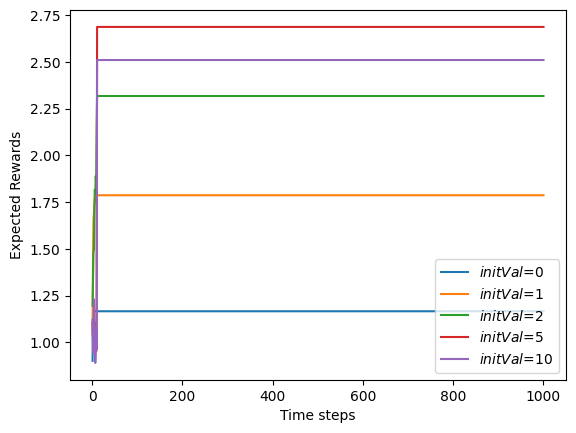

In [27]:
initValues = [0, 1, 2, 5, 10]
# allEps = [0, 0.001]
plotExplorations(initValues, optimisticInitialization, num_trials=100,
                 paramLabelName=r"$initVal$", num_steps=1000, noiseParams=(0, 0))
plt.legend()
plt.show()


### With noises sampled from N(0, 1)

100%|██████████| 100/100 [00:00<00:00, 261.58it/s]


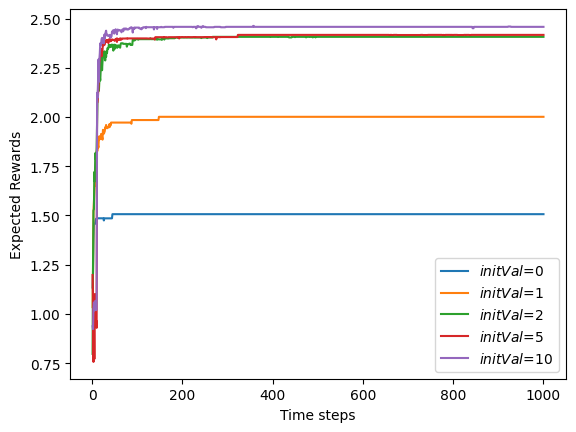

In [7]:
initValues = [0, 1, 2, 5, 10]
# allEps = [0, 0.001]
plotExplorations(initValues, optimisticInitialization, num_trials=100,
                 paramLabelName=r"$initVal$", num_steps=1000, noiseParams=(0, 1))
plt.legend()
plt.show()


## UCB

In [28]:

# UCB EXPLORATION TEMPLATE
def ucbExploration(c, steps, k, realRewards, n: np.array, noiseParams, pull_arm_once=True):
    # TO DO: initialize structure to hold expected rewards per step
    expectedRewards = []
    # TO DO: initialize q values per arm
    qs = init_qs(k)
    if pull_arm_once:
        for arm in range(k):
            qs[arm] = genObservedReward(arm, realRewards, noiseParams)
            n[arm] += 1
    # TO DO: implement the UCB exploration algorithm over all steps and return the expected rewards across all steps
    for step in range(0, steps):
        if not pull_arm_once:
            scores = qs + c * np.sqrt(np.log(step + 1) / (n + 1e-5)) # avoid divide by zero
        else:
            scores = qs + c * np.sqrt(np.log(step + 1) / n)

        # if step % 500 == 0:
        #     print("c: ", c, "step: ", step, "scores: ", scores)

        arm = argmax_tiebreak(scores)
        observedReward = genObservedReward(arm, realRewards, noiseParams)
        # expectedRewards.append(realRewards[arm])
        expectedRewards.append(realRewards[np.argmax(qs)])

        n[arm] += 1
        qs[arm] = qs[arm] + (observedReward - qs[arm]) / n[arm]

    return expectedRewards


Check analytic reward solution with notebook example  

![Sutton&Barto text book result](sutton-barto-ucb-fig.png)


100%|██████████| 100/100 [00:04<00:00, 22.84it/s]


first ten expected rewards:  [2.56910561 2.56910561 2.56910561 2.56910561 2.56910561 2.56910561
 2.56910561 2.56910561 2.56910561 2.56910561]


100%|██████████| 100/100 [00:04<00:00, 24.00it/s]


first ten expected rewards:  [2.48273907 2.48273907 2.48273907 2.48273907 2.48273907 2.48273907
 2.48273907 2.48273907 2.48273907 2.48273907]


100%|██████████| 100/100 [00:04<00:00, 24.36it/s]


first ten expected rewards:  [2.67698159 2.67698159 2.67698159 2.67698159 2.67698159 2.67698159
 2.67698159 2.67698159 2.67698159 2.67698159]


100%|██████████| 100/100 [00:04<00:00, 24.23it/s]


first ten expected rewards:  [2.50057462 2.50057462 2.50057462 2.50057462 2.50057462 2.50057462
 2.50057462 2.50057462 2.50057462 2.50057462]


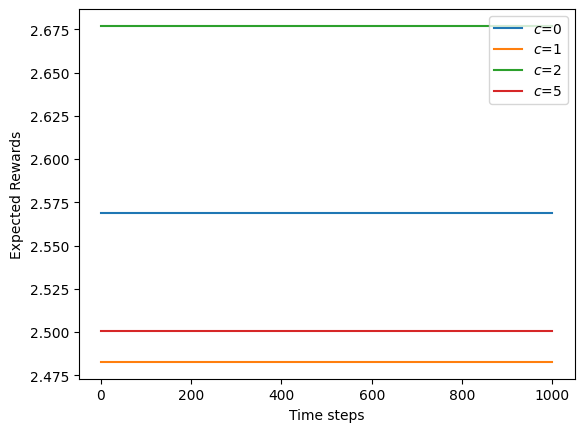

In [31]:
cs = [0, 1, 2, 5]
# cs = [2]
# allEps = [0, 0.001]
plotExplorations(cs, ucbExploration, num_trials=100,
                 paramLabelName=r"$c$", num_steps=1000, noiseParams=(0, 0))
plt.legend()
plt.show()


### noise from N(0, 1)

100%|██████████| 100/100 [00:04<00:00, 24.35it/s]


first ten expected rewards:  [2.07104189 2.09313104 2.10535452 2.08735548 2.10809528 2.23192762
 2.24086886 2.23741781 2.27580113 2.29439629]


100%|██████████| 100/100 [00:04<00:00, 24.33it/s]


first ten expected rewards:  [2.11949929 2.13058944 2.23114982 2.20214759 2.28484349 2.32663373
 2.32434587 2.36685395 2.36898249 2.41042495]


100%|██████████| 100/100 [00:04<00:00, 24.98it/s]


first ten expected rewards:  [2.13179743 2.18850941 2.17758779 2.22880568 2.19035385 2.25538566
 2.26854385 2.29233825 2.29925095 2.30734517]


100%|██████████| 100/100 [00:04<00:00, 24.83it/s]


first ten expected rewards:  [2.03167543 2.12185457 2.16230018 2.21871418 2.21986864 2.2079509
 2.21173508 2.1997102  2.20590893 2.24216683]


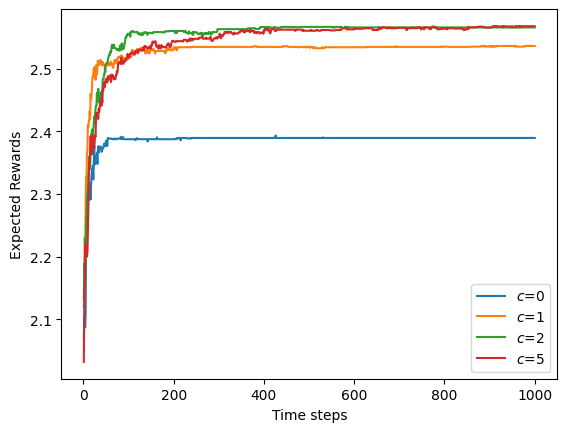

In [30]:
cs = [0, 1, 2, 5]
# allEps = [0, 0.001]
plotExplorations(cs, ucbExploration, num_trials=100,
                 paramLabelName=r"$c$", num_steps=1000, noiseParams=(0, 1))
plt.legend()
plt.show()


### Do NOT pull arm once for q initialization

100%|██████████| 100/100 [00:03<00:00, 27.42it/s]


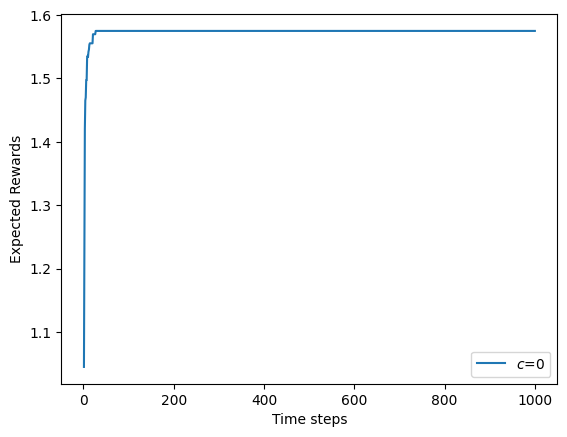

In [11]:
# cs = [0, 1, 2, 5]
cs = [0]
# allEps = [0, 0.001]
plotExplorations(cs, ucbExploration, num_trials=100,
                 paramLabelName=r"$c$", num_steps=1000, noiseParams=(0, 1), pull_arm_once=False)
plt.legend()
plt.show()


## Boltzman

In [12]:
# BOLTZMANN EXPLORATION TEMPLATE
def boltzmannE(temperature, steps, k, realRewards, n, noiseParams):
    expectedRewards = []
    qs = init_qs(k)

    for step in range(steps):
        # state copnfiguration for each state (arm)
        configs = np.exp(temperature * qs)
        config_probs = configs / (np.sum(configs))
        # arm = np.argmax(config_probs)
        arm = np.random.choice(k, p=config_probs)
        observedReward = genObservedReward(arm, realRewards, noiseParams)
        expectedRewards.append(np.sum(config_probs * realRewards))
        n[arm] += 1
        qs[arm] = qs[arm] + (observedReward - qs[arm]) / n[arm]

    return expectedRewards


### Fixed rewards without noises

100%|██████████| 100/100 [00:03<00:00, 28.75it/s]


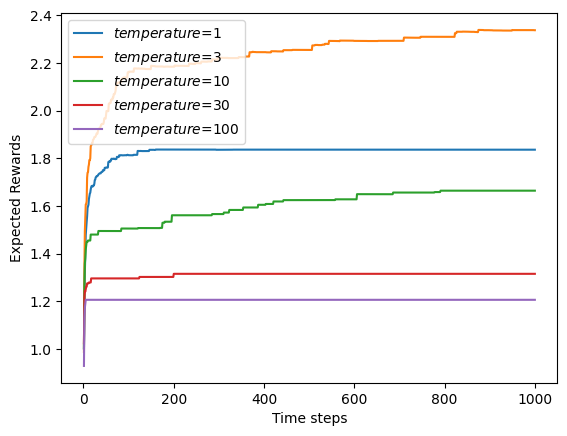

In [13]:
temperatures = [1, 3, 10, 30, 100]
# allEps = [0, 0.001]
plotExplorations(temperatures, boltzmannE, num_trials=100,
                 paramLabelName=r"$temperature$", num_steps=1000, noiseParams=(0, 0))
plt.legend()
plt.show()


### Withnoises from N(0, 1)

100%|██████████| 100/100 [00:03<00:00, 28.06it/s]


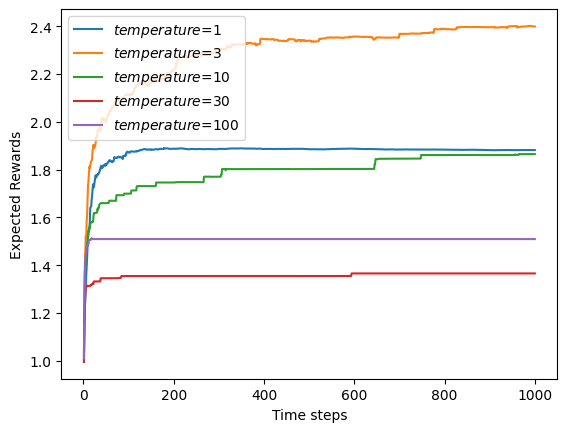

In [14]:
temperatures = [1, 3, 10, 30, 100]
# allEps = [0, 0.001]
plotExplorations(temperatures, boltzmannE, num_trials=100,
                 paramLabelName=r"$temperature$", num_steps=1000, noiseParams=(0, 1))
plt.legend()
plt.show()


## Q2.5 Compare the three exploration strategies by plotting the best-performing hyperparameter setting for each method. That is, create a single plot showing expected reward over 1000 time steps with three lines, corresponding to the best hyperparame- ters for ε-greedy, optimistic initialization, and UCB exploration.

In [33]:
# algorithms specific params
eps = 0.1
initVal = 5
ucb_c = 5
temperature = 3

# trials configs
noiseParams = (0, 1)
num_trials = 1000

epsExpectedRewards = explorationAlgorithm(
    epsilonGreedy, param=eps, num_trials=num_trials, noiseParams=noiseParams)

optimExpectedRewards = explorationAlgorithm(
    optimisticInitialization, param=initVal, num_trials=num_trials, noiseParams=noiseParams)

ucbExpectedRewards = explorationAlgorithm(
    ucbExploration, param=ucb_c, num_trials=num_trials, noiseParams=noiseParams)
boltzmannExpectedRewards = explorationAlgorithm(
    boltzmannE, param=temperature, num_trials=num_trials, noiseParams=noiseParams)


100%|██████████| 1000/1000 [00:37<00:00, 26.73it/s]


<AxesSubplot: >

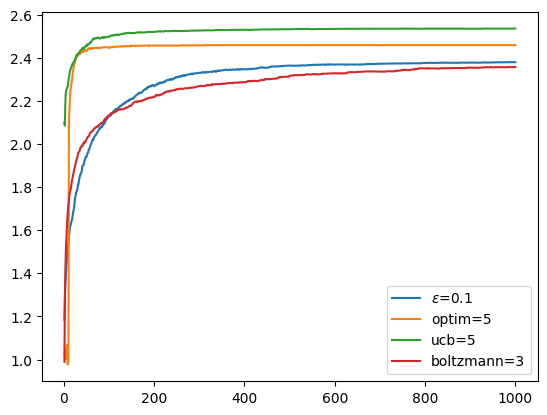

In [34]:
import seaborn as sns
xs = np.arange(1, 1000 + 1)
sns.lineplot(y=epsExpectedRewards, x=xs, label=r"$\varepsilon$=" + str(eps))
sns.lineplot(y=optimExpectedRewards, x=xs, label="optim=" + str(initVal))
sns.lineplot(y=ucbExpectedRewards, x=xs, label="ucb="+str(ucb_c))
sns.lineplot(y=boltzmannExpectedRewards, x=xs, label="boltzmann="+str(temperature))


## Q2.6  In 2-3 sentences, explain a setting where you might not want to use the best- performing exploration strategy you found above.